In [2]:
import csv
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.svm import SVC, LinearSVC

%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# SVM with linear kernel

In [3]:
# Load dataset 1
data = sio.loadmat('data1.mat')

In [4]:
# Examples with features x1 and x2
X = data['X']
# Examples target class (0=neg, 1=pos)
y = data['y'].ravel()

In [5]:
def plot_data(X, y):
    '''Plots examples X and their class y in a 2D scatter plot.
    
    X must be an array of shape (m,2)
    y must be an array of shape (m,)
    '''
    
    plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
    plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='lower left')

In [6]:
def plot_boundary(X, clf, level=0.0):
    '''Plots a decision boundary using trained classifier clf.
    
    The decision boundary is drawn at given level (default=0.0)
    in the range of X. X must be an array of shape (m,2).
    '''
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    h = 0.01 # grid step size
    grid_x1, grid_x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                                   np.arange(x2_min, x2_max, h))
    
    grid_y = clf.predict(np.c_[grid_x1.ravel(), grid_x2.ravel()])
    grid_y = grid_y.reshape(grid_x1.shape)

    x1_extra = (x1_max - x1_min) / 50
    x2_extra = (x2_max - x2_min) / 50
    
    plt.xlim(x1_min - x1_extra, x1_max + x1_extra)
    plt.ylim(x2_min - x2_extra, x2_max + x2_extra)
    
    plt.contour(grid_x1, grid_x2, grid_y, levels=[level])

In [7]:
def plot_support_vectors(clf):
    '''Plot the support vectors from trained support vector classifier clf.
    
    Only the support vectors of the first two classes are drawn.
    '''
    
    # Obtain support vectors for first two classes
    sv_neg, sv_pos = np.vsplit(clf.support_vectors_, np.cumsum(clf.n_support_)[0:1])

    # Plot support vectors
    plt.plot(sv_neg[:,0], sv_neg[:,1], 'r+', label='neg SVs', alpha=0.5)
    plt.plot(sv_pos[:,0], sv_pos[:,1], 'rx', label='pos SVs', alpha=0.5)
    plt.legend()

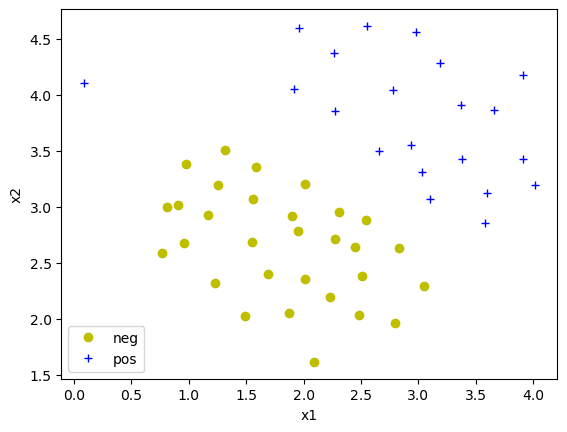

In [8]:
# Plot dataset 1
plot_data(X, y)

In [9]:
# Train a support vector classifier with C=1 using a linear kernel.
# SVC uses libsvm. For scaling to a large number of examples consider
# using LinearSVC which uses liblinear instead (see docs for details).
clf = SVC(C=1, kernel='linear') 
clf.fit(X, y)

SVC(C=1, kernel='linear')

Text(0.5, 1.0, 'C=1')

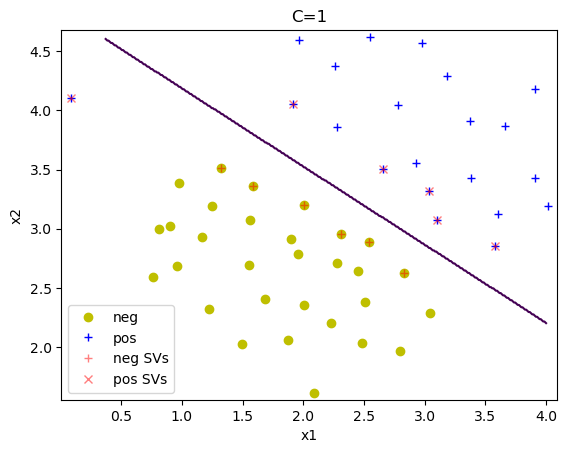

In [10]:
plot_data(X, y)
plot_boundary(X, clf)
plot_support_vectors(clf)
plt.title('C=1')

In [11]:
# Train a support vector classifier with C=100 using a linear kernel.
clf = SVC(C=100, kernel='linear')
clf.fit(X, y)

SVC(C=100, kernel='linear')

Text(0.5, 1.0, 'C=100')

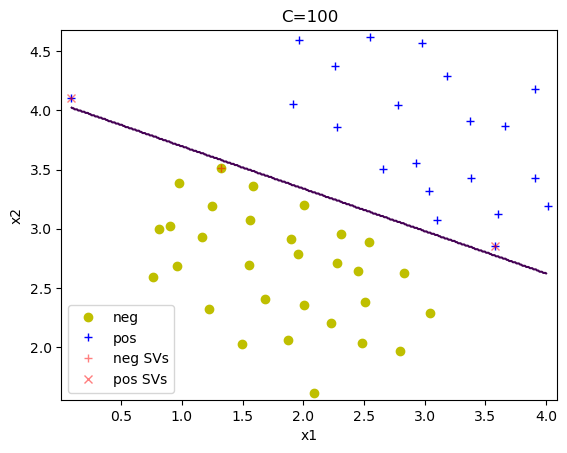

In [12]:
plot_data(X, y)
plot_boundary(X, clf)
plot_support_vectors(clf)
plt.title('C=100')

# SVM with Gaussian kernel

In [13]:
# Load dataset 2
data = sio.loadmat('data2.mat')

In [14]:
# Examples with features x1 and x2
X = data['X']
# Examples target class (0=neg, 1=pos)
y = data['y'].ravel()

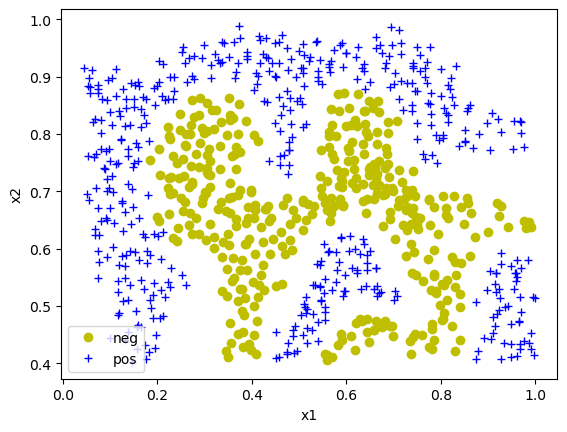

In [15]:
# Plot dataset 2
plot_data(X, y)

In [16]:
# Train a support vector classifier with C=1 using an RBF kernel.
# In ex6.m (original Octave exercise code), sigma=0.1, hence we
# set gamma to 100 (=1/sigma**2)
clf = SVC(C=1, kernel='rbf', gamma=100)
clf.fit(X, y)

SVC(C=1, gamma=100)

Text(0.5, 1.0, 'C=1, gamma=100')

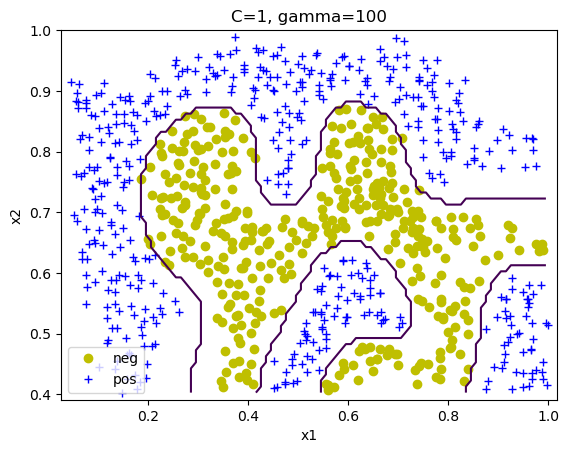

In [17]:
plot_data(X, y)
plot_boundary(X, clf)
plt.title('C=1, gamma=100')

In [18]:
# Load dataset 3
data = sio.loadmat('data3.mat')

# Training data 
X_train_0 = data['X']
y_train_0 = data['y'].ravel()

# Validation data
X_cv_0 = data['Xval']
y_cv_0 = data['yval'].ravel()

Text(0.5, 1.0, 'Training data')

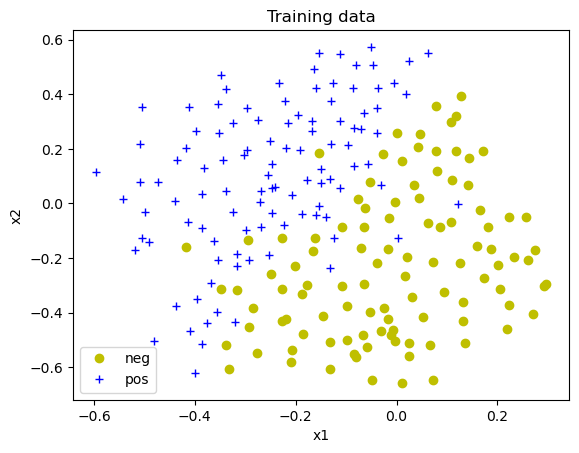

In [19]:
plot_data(X_train_0, y_train_0)
plt.title('Training data')

Text(0.5, 1.0, 'Validation data')

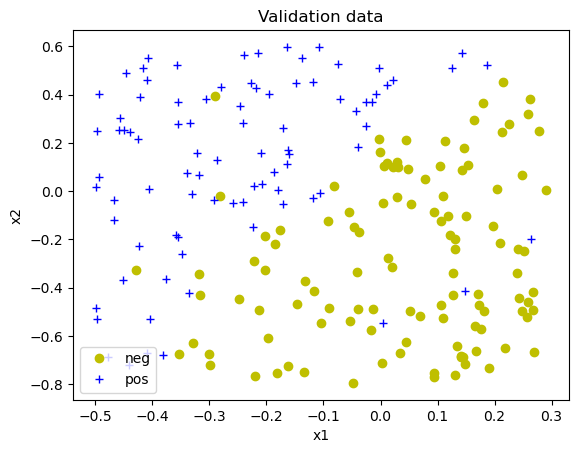

In [20]:
plot_data(X_cv_0, y_cv_0)
plt.title('Validation data')

In [21]:
# Concatenate training and validation data
X = np.concatenate([X_train_0, X_cv_0])
y = np.concatenate([y_train_0, y_cv_0])

num_train = X_train_0.shape[0]
num_cv = X_cv_0.shape[0]

# Create a cross validator that selects the pre-defined 
# validation dataset from the concatenated dataset.
cv_fold = np.empty(num_train + num_cv, dtype='int8')
cv_fold[:num_train] = -1
cv_fold[num_train:] = 0
cv = PredefinedSplit(cv_fold)

In [22]:
# Values for grid search (see description in ex6.pdf)
grid = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

# Grid values for C
grid_C = grid
# Grid values for gamma
grid_gamma = 1 / (grid ** 2)

In [23]:
# Classifier used for grid search
clf = SVC(kernel='rbf')

# Grid search to find the best C and gamma values using the predefined
# training and validation set.
gs = GridSearchCV(clf, param_grid={'C':grid_C, 'gamma':grid_gamma}, cv=cv)
gs.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVC(),
             param_grid={'C': array([1.e-02, 3.e-02, 1.e-01, 3.e-01, 1.e+00, 3.e+00, 1.e+01, 3.e+01]),
                         'gamma': array([1.00000000e+04, 1.11111111e+03, 1.00000000e+02, 1.11111111e+01,
       1.00000000e+00, 1.11111111e-01, 1.00000000e-02, 1.11111111e-03])})

In [24]:
# Display grid search results in a pandas DataFrame
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005984,0.0,0.008630,0.0,0.01,10000.0,"{'C': 0.01, 'gamma': 10000.0}",0.435,0.435,0.0,42
1,0.006978,0.0,0.015729,0.0,0.01,1111.111111,"{'C': 0.01, 'gamma': 1111.111111111111}",0.435,0.435,0.0,42
2,0.004665,0.0,0.000000,0.0,0.01,100.0,"{'C': 0.01, 'gamma': 99.99999999999999}",0.435,0.435,0.0,42
3,0.015681,0.0,0.005978,0.0,0.01,11.111111,"{'C': 0.01, 'gamma': 11.11111111111111}",0.435,0.435,0.0,42
4,0.003989,0.0,0.007052,0.0,0.01,1.0,"{'C': 0.01, 'gamma': 1.0}",0.435,0.435,0.0,42
...,...,...,...,...,...,...,...,...,...,...,...
59,0.000000,0.0,0.000000,0.0,30.0,11.111111,"{'C': 30.0, 'gamma': 11.11111111111111}",0.960,0.960,0.0,3
60,0.000000,0.0,0.016130,0.0,30.0,1.0,"{'C': 30.0, 'gamma': 1.0}",0.935,0.935,0.0,11
61,0.003562,0.0,0.001992,0.0,30.0,0.111111,"{'C': 30.0, 'gamma': 0.1111111111111111}",0.935,0.935,0.0,11
62,0.001994,0.0,0.002992,0.0,30.0,0.01,"{'C': 30.0, 'gamma': 0.01}",0.915,0.915,0.0,18


In [25]:
# Obtain best classifier from grid search
clf_best = gs.best_estimator_

In [26]:
print('best C value =', clf_best.C)

best C value = 0.3


In [27]:
print('best gamma value =', clf_best.gamma)

best gamma value = 99.99999999999999


Text(0.5, 1.0, 'C=0.3, gamma=100.0')

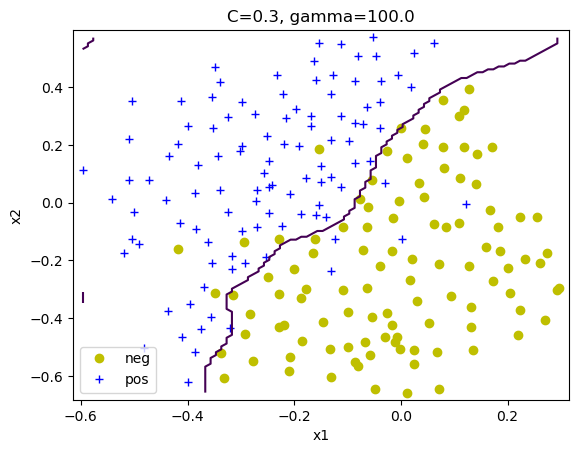

In [28]:
plot_data(X_train_0, y_train_0)
plot_boundary(X_train_0, clf_best)
plt.title(f'C={clf_best.C:.4}, gamma={clf_best.gamma:.4}')

# Spam classification

In [30]:
# Load spam classification training data
data_train = sio.loadmat('spamTrain.mat')
# Load spam classification test data
data_test = sio.loadmat('spamTest.mat')

In [31]:
# Example feature vectors
X_train = data_train['X']
X_test = data_test['Xtest']

# Example classes (0=non-spam, 1=spam)
y_train = data_train['y'].ravel()
y_test = data_test['ytest'].ravel()

In [32]:
# Train a linear SVC (running liblinear) using the 
# same value for C as in in the original exercise 
# (see ex6_spam.m)
clf = LinearSVC(C=0.1)
clf.fit(X_train, y_train)

C:\Users\SAI TARUN\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=0.1)

In [33]:
# Training score
clf.score(X_train, y_train)

0.99975

In [34]:
# Test score
clf.score(X_test, y_test)

0.992

In [36]:
vocab = {}

# Read provided vocabulary from vocab.txt file and add 
# content to vocab, converting 1-based to 0-based index
with open('vocab.txt') as vocab_file:
    for row in csv.reader(vocab_file, delimiter='\t'):
        word = row[1]
        index = int(row[0]) - 1
        vocab[word] = index

In [37]:
def read_file(file):
    with open(file) as f:
        return f.read()

# Read non-spam email samples
email_1 = read_file('emailSample1.txt')
email_2 = read_file('emailSample2.txt')

# Read spam email samples
spam_1 = read_file('spamSample1.txt')
spam_2 = read_file('spamSample2.txt')

In [38]:
# Print first 200 characters of a non-spam sample
print(email_1[:200], '...')

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should  ...


In [39]:
# Print first 200 characters of a spam sample
print(spam_1[:200], '...')

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NO ...
